# ABM TP4

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import powerlaw
from scipy.optimize import minimize

## 1. Implement Franke and Westerhoff model

In [88]:
### Variables, constants ###

N = 10 # number of agents
Nit = 10000 # time steps
pf = 0 # fundamental price
sigma_f = 0.79 # std of fundamentalists
sigma_c = 1.91 # std of chartists
alpha_x = 1.35 # herding
alpha_d = 11.4 # pull-back to pf
d_f = np.zeros(Nit)
eps_f = np.random.normal(0, sigma_f, Nit)
d_c = np.zeros(Nit)
eps_c = np.random.normal(0, sigma_c, Nit)
d = np.zeros(Nit) # demand
r = np.zeros(Nit) # return
mu = 0.01
nu = 2.57

In [89]:

def compute_r(phi, khi, alpha_0):
    sigma = np.zeros(Nit) # volatility
    s = np.zeros(Nit) # controls stability of fundamental price
    x = np.zeros(Nit) # describes evolution of fraction of fundamentalists/chartists - abs(x[t]) < 1 always
    p = np.zeros(Nit) # price
    eps = np.zeros(Nit)
    ## init ##
    x[1] = 1/2
    p[0], p[1] = 0, 0

    ## iter ##

    for t in range(1, Nit-1):
        sigma[t] = (1/2)*(((1 + x[t-1])**2)*sigma_f + ((1 - x[t-1])**2)*sigma_c)
        eps[t] = np.random.normal(0, sigma[t])
        p[t+1] = p[t] + (mu/2)*((1+x[t])*phi * (pf - p[t]) + (1 - x[t])*khi * (p[t] - p[t-1]) + eps[t])
        r[t+1] = p[t+1] - p[t]
        x[t+1] = x[t] + nu*((1 - x[t])*np.exp(s[t]) - (1 + x[t])*np.exp(-s[t])) if np.abs(x[t] + nu*((1 - x[t])*np.exp(s[t]) - (1 + x[t])*np.exp(-s[t]))) < 1 else np.sign(x[t] + nu*((1 - x[t])*np.exp(s[t]) - (1 + x[t])*np.exp(-s[t])))*1
        s[t+1] = alpha_0 + alpha_x*x[t+1] + alpha_d*((pf - p[t+1])**2)

    return r


## 2. Explore FW model's behaviour

In [90]:
r = compute_r(0.18, 2.35, -0.15)

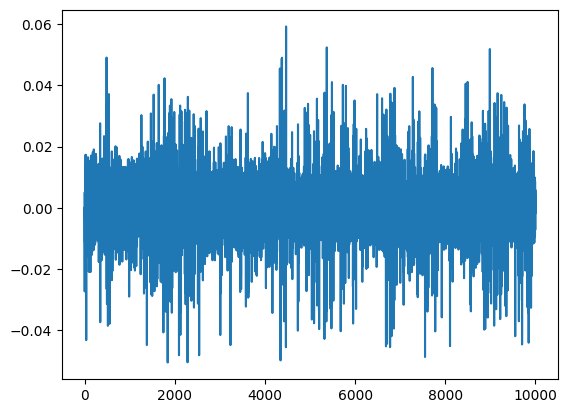

In [91]:
plt.plot(r)

In [92]:
ft = powerlaw.Fit(abs(r))

def compute_powerlaw_curve(xmin,xmax,ymax,alpha): 
    
    dx = np.linspace(xmin,xmax,100) 
    
    y = dx**(-alpha)
    
    return dx,  ymax*y/y[0] 

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


2.4679175571045566


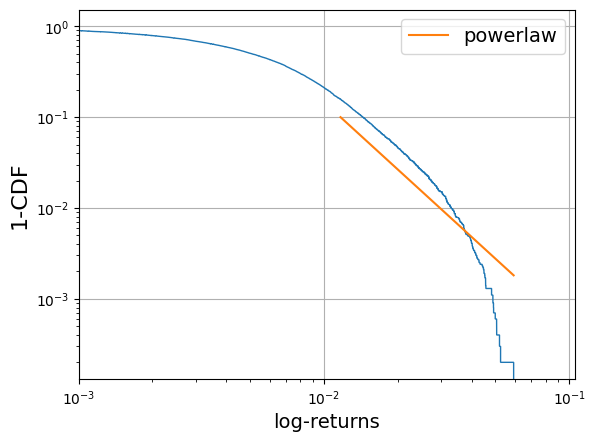

In [93]:
bn = sorted(set(abs(r))) 


plt.hist(abs(r),bins=bn,density=True,cumulative=-1,histtype='step')

dx,dy = compute_powerlaw_curve(ft.xmin, max(abs(r)), 1e-1,  ft.alpha-1) 
plt.plot(dx,dy,label='powerlaw') 


plt.yscale('log')
plt.xscale('log')
plt.xlim(xmin=1e-3)
plt.xlabel('log-returns',fontsize=14)
plt.ylabel('1-CDF',fontsize=16)
plt.legend(loc='best',fontsize=14)
plt.grid()
print(ft.alpha - 1)

The value is pretty close to 2, indicating a fat tail.

In [94]:
def parameter_test(param_type, param_list, other_params, Navg = 5):
    Ntest = param_list.shape[0]
    c = np.zeros((Ntest, Navg))
    if param_type == 'phi':
        for i in range(Ntest):
            for j in range(Navg):
                c[i,j] = powerlaw.Fit(np.abs(compute_r(param_list[i], other_params[0], other_params[1]))).alpha - 1
    elif param_type == 'khi':
        for i in range(Ntest):
            for j in range(Navg):
                c[i,j] = powerlaw.Fit(np.abs(compute_r(other_params[0], param_list[i], other_params[1]))).alpha - 1
    elif param_type == 'alpha':
        for i in range(Ntest):
            for j in range(Navg):
                c[i,j] = powerlaw.Fit(np.abs(compute_r(other_params[0], other_params[1], param_list[i]))).alpha - 1
    else:
        return -1
    
    return np.mean(c, axis=1)


In [96]:
phi = 0.18
khi = 2.35
alpha_0 = -0.15

phi_list = np.array([2, 4, 6, 15, 30, 60])
khi_list = np.array([2, 7, 15, 25, 45, 90])
alpha_list = np.array([-50, -24, -12, -5, -0.05])

c_phi = parameter_test('phi', phi_list, [khi, alpha_0], 2)
c_khi = parameter_test('khi', khi_list, [phi, alpha_0], 2)
c_alpha = parameter_test('alpha', alpha_list, [phi, khi], 2)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


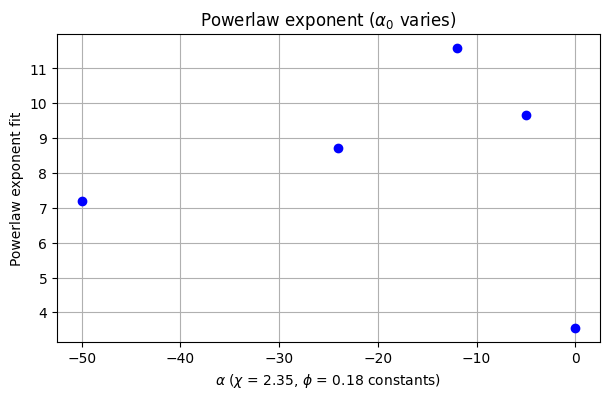

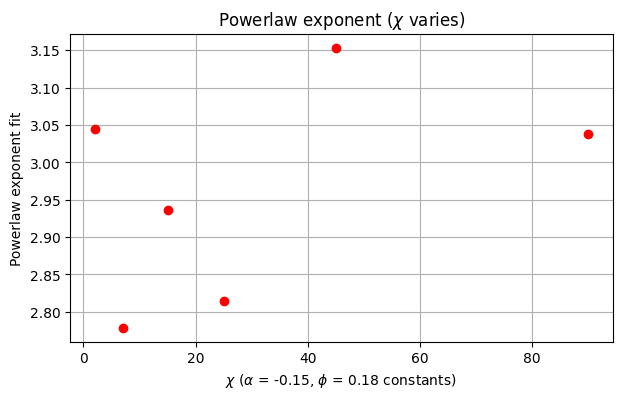

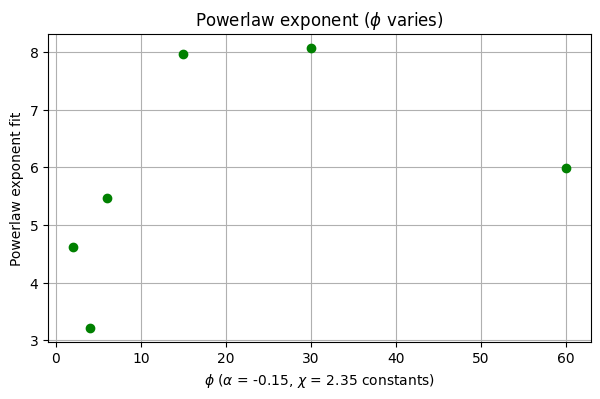

In [97]:
%matplotlib inline

plt.figure(figsize=(7,4))
plt.plot(alpha_list, c_alpha, 'bo')
plt.title('Powerlaw exponent ($\\alpha_0$ varies)')
plt.xlabel(r"$\alpha$ ($\chi$ = {}, $\phi$ = {} constants)".format(khi, phi))
plt.ylabel('Powerlaw exponent fit')
plt.grid(True)
plt.show()

plt.figure(figsize=(7,4))
plt.plot(khi_list, c_khi, 'ro')
plt.title('Powerlaw exponent ($\\chi$ varies)')
plt.xlabel(r"$\chi$ ($\alpha$ = {}, $\phi$ = {} constants)".format(alpha_0, phi))
plt.ylabel('Powerlaw exponent fit')
plt.grid(True)
plt.show()

plt.figure(figsize=(7,4))
plt.plot(phi_list, c_phi, 'go')
plt.title('Powerlaw exponent ($\\phi$ varies)')
plt.xlabel(r"$\phi$ ($\alpha$ = {}, $\chi$ = {} constants)".format(alpha_0, khi))
plt.ylabel('Powerlaw exponent fit')
plt.grid(True)
plt.show()

We clearly see that the value of $c$ doesn't uniquely determine the model parameter set.

## 3. Calibrate the model

In [63]:
rt = pd.read_csv('rt.csv', index_col=0)
return_from_file = rt['0']

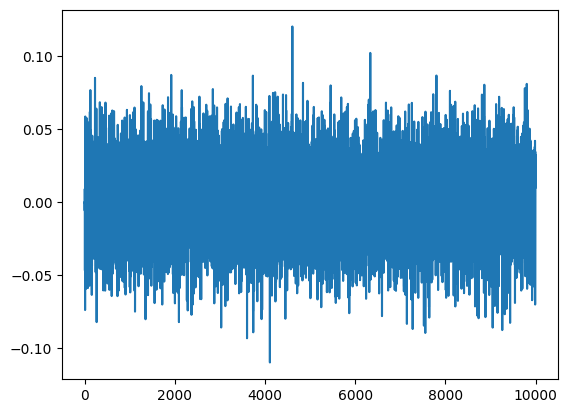

In [65]:
plt.plot(return_from_file)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
8.192649641974148%


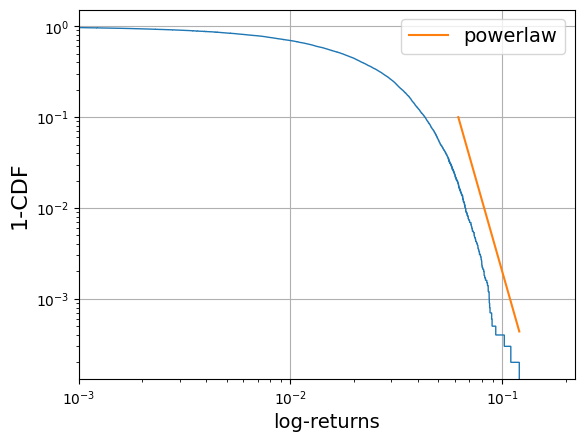

In [68]:
ft_from_file = powerlaw.Fit(abs(return_from_file))

bn = sorted(set(abs(return_from_file))) 


plt.hist(abs(return_from_file),bins=bn,density=True,cumulative=-1,histtype='step')

dx,dy = compute_powerlaw_curve(ft_from_file.xmin, max(abs(return_from_file)), 1e-1,  ft_from_file.alpha-1) 
plt.plot(dx,dy,label='powerlaw') 


plt.yscale('log')
plt.xscale('log')
plt.xlim(xmin=1e-3)
plt.xlabel('log-returns',fontsize=14)
plt.ylabel('1-CDF',fontsize=16)
plt.legend(loc='best',fontsize=14)
plt.grid()
print(ft_from_file.alpha - 1)

We can see a much higher value of the tail exponent than before.

In [74]:
cfile = ft_from_file.alpha - 1

In [75]:
def get_exponent(params):
    r = compute_r(params[0], params[1], params[2])
    ft = powerlaw.Fit(np.abs(r))
    c = ft.alpha - 1

    return (cfile - c)**2

Takes a while to compute :(

In [76]:
minimize(get_exponent, (0.18, 2.35, -0.15))

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


/var/folders/8b/n698w4wx4jb8pkkpjklqc4mr0000gn/T/ipykernel_66968/1312283791.py:18: RuntimeWarning: overflow encountered in exp
  x[t+1] = x[t] + nu*((1 - x[t])*np.exp(s[t]) - (1 + x[t])*np.exp(-s[t])) if np.abs(x[t] + nu*((1 - x[t])*np.exp(s[t]) - (1 + x[t])*np.exp(-s[t]))) < 1 else np.sign(x[t] + nu*((1 - x[t])*np.exp(s[t]) - (1 + x[t])*np.exp(-s[t])))*1
/var/folders/8b/n698w4wx4jb8pkkpjklqc4mr0000gn/T/ipykernel_66968/1312283791.py:18: RuntimeWarning: invalid value encountered in double_scalars
  x[t+1] = x[t] + nu*((1 - x[t])*np.exp(s[t]) - (1 + x[t])*np.exp(-s[t])) if np.abs(x[t] + nu*((1 - x[t])*np.exp(s[t]) - (1 + x[t])*np.exp(-s[t]))) < 1 else np.sign(x[t] + nu*((1 - x[t])*np.exp(s[t]) - (1 + x[t])*np.exp(-s[t])))*1
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


      fun: 25.110854287823962
 hess_inv: array([[ 2.42975855,  0.62333569, -0.8009527 ],
       [ 0.62333569,  0.78830812, -0.85116738],
       [-0.8009527 , -0.85116738,  0.92748646]])
      jac: array([2.04293967e+08, 2.91250551e+08, 9.54854172e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 84
      nit: 1
     njev: 18
   status: 2
  success: False
        x: array([ 0.1799989 ,  2.35000016, -0.14999872])

No success with `minimize`. The final message mentions precision errors.

In [100]:
# tâtonnement
get_exponent([15, 2.35, -0.15])

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


11.265765851775862

We find a low value with this set of parameters.

## 3. Calibrate II

In [102]:
min_params = [15, khi, alpha_0]
c_run = np.zeros(20)

for i in range(20):
    c_run[i] = get_exponent(min_params)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


In [103]:
avg_c = np.mean(c_run)
std_c = np.std(c_run)

print('{}'.format(np.abs(cfile - avg_c)))
print('{}'.format(std_c))

2.298748701215496
6.640760766299908


We see that the average over the runs is pretty close to $c_{file}$ but the standard deviation runs large (3x the absolute difference between the avg and $c_{file}$). This is the precision problem the minimize function had trouble with.